<a href="https://colab.research.google.com/github/LPaolaDuarte/Talento-tech/blob/main/TUTORIAL_LIMPIEZA_DE_DATOS_CON_PYTHON_Y_PANDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUTORIAL: LIMPIEZA DE DATOS CON PYTHON Y PANDAS**

1. **El problema del negocio**

Una entidad bancaria contrata una empresa de marketing encargada de contactar telefonicamente a posibles clientes para determinar si estan interesados o no en adquirir una certificado de deposito a termino con el banco

2. **El set de datos**

la informacion recolectada por la empresa de mercadeo se encuentra en un archivo CSV (datast_banco.csv) con 45215 filas y 17 columnas
cada registro contiene 16 caracteristicas (las primeras 16 columnas) y una categoria ("yes" o "no" depeendiendo de si la persona esta o no interesada en adquirir el producto). Las columnas son:
 1. "age": edad (numerica)
 2. "job": tipo de trabajo (categorica:"admin","unknown","unemployed","management","housemaid","entrepreneusr",student",bleu-collar","self-employed","retired","technician","services")
 3. "marital": estado civil(categoria: "married","divorced","sigle"
 4. "education":nivel educativo (categorica:"unknown","secondary","primary","tertiary")
 5. "default": si dejo de pagar sus obligaciones(categorica:"yes","no")
 6. "balance": saldo promedio anual en euros (numerica)
 7. "housing": ¿tiene o no credito hipotecario?(categorica: "yes" o "no")
 8. "loan":¿tiene creditos de consumo?(categorica: "yes" o "no")
 9. "contract": medio a través del cual fue contactado (categoria: "unknown", "telephone","cellular")
 10. "day": ultimo dia del mes en el que fue contactada (numerica)
 11. "mount": ultimo mes en el que fue contactada(categoria:"jan","feb","mar",...,"nov","dec")
 12. "duration": duracion(en segundos)del ultimo contacto (numerica)
 13. "campaign": numero total de veces que fue contactada durante la campaña (numerica)
 14. "pdays": numero de dias transcurridos despues de haber sido contactado antes de la campaña actual (numerica.-1 indicada que no fue contactado previamente)
 15. "previous": numero de veces que ha sido contactada antes de esta campaña (numerica)
 16. "pountcome": resultados de la campaña de marketing anterior (catagorica: "unknown","other","failure","success")
 17. "y": categorica ¿el cliente se suscribio a un deposito a termino?(categorica:"yes","no")


3.**Una primera mirada al data set**

In [1]:
# importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lectura
from google.colab import drive
drive.mount('/content/dive')

ruta = "/content/dive/MyDrive/Colab Notebooks/DA_Talento/data/dataset_banco.csv"
data = pd.read_csv(ruta)

Mounted at /content/dive


In [ ]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [ ]:
# Vemos las variables categoricas y numericas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


**4. Limpieza**

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones mas comunes:
 1. Datos faltantes en algunas celdas
 2. Columnas irrelevantes (que no responden al problema que queremos resolver)
 3. registros (filas) repetitidos
 4. Valores extremos (outliers) en caso de las variables numerica. Se deben analizar en detalle pues no necesariamente la solucion es eliminarlos
 5. Errores tipograficos en el caso de las variables categoricas

al final de este proceso de limpieza deberiamos tener un set de datos **integro** , listo para la fase de Análisis Exploratorio

## 4.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:



In [3]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

Notas acerca de ciclo FOR

for col in cols_cat:: Este es un bucle for que itera sobre cada elemento en la lista cols_cat. La variable col tomará el valor de cada elemento en cada iteración del bucle.

print(f'Columna {col}: {data[col].nunique()} subniveles'): Dentro del bucle, esta línea de código imprime un mensaje que indica el nombre de la columna (col), seguido por el número de subniveles únicos en esa columna.

f'Columna {col}: {data[col].nunique()} subniveles': Esta es una cadena de formato (f-string) que contiene dos variables:
{col}: Representa el nombre de la columna actual en la iteración del bucle.
{data[col].nunique()}: Representa el número de subniveles únicos en la columna actual. data[col] selecciona la columna actual del DataFrame y .nunique() calcula el número de valores únicos en esa columna.



In [4]:
# Conteo de los niveles en las diferentes columnas
cols_cat = ['job', 'marital' , 'education', 'default', 'housing', 'loan' , 'contact', 'month', 'poutcome', 'y']

for col in cols_cat:
 print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna job: 18 subniveles
Columna marital: 6 subniveles
Columna education: 10 subniveles
Columna default: 2 subniveles
Columna housing: 2 subniveles
Columna loan: 6 subniveles
Columna contact: 5 subniveles
Columna month: 12 subniveles
Columna poutcome: 6 subniveles
Columna y: 2 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservamos todas las columnas numéricas.

La desviación estándar es una medida que nos indica qué tan dispersos o alejados están los valores de un conjunto de datos respecto a su media o promedio. En otras palabras, nos ayuda a entender cuánto varían los valores individuales de un conjunto de datos con respecto a su valor promedio.

Imagina que tienes un conjunto de datos que representa las alturas de estudiantes en una clase. Si la desviación estándar es baja, significa que la mayoría de los estudiantes tienen alturas muy similares entre sí y cercanas a la altura promedio de la clase. Por otro lado, si la desviación estándar es alta, significa que las alturas de los estudiantes están muy dispersas, algunos son muy altos y otros muy bajos en comparación con la altura promedio.

Entonces, la desviación estándar nos da una idea de la dispersión o variabilidad de los datos alrededor de su promedio. Una desviación estándar baja indica que los datos están más agrupados alrededor del promedio, mientras que una desviación estándar alta indica que los datos están más dispersos o separados del promedio.


In [6]:
#count = data['pdays']=1.count_()
count = data['pdays'].value_counts()[-1]

print (count)

36953


In [7]:
# Calcula la media del atributo "pdays: dias de contacto al usuario antes de la campaña actual "
media = data [ 'pdays'].mean()

print("media de la pdays:",media)

media de la pdays: 40.17822461123277


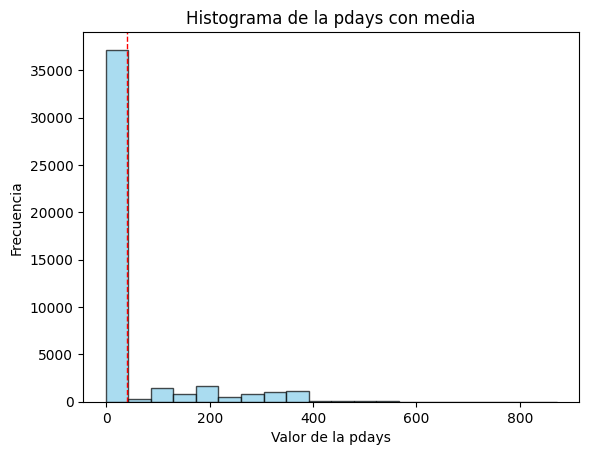

In [8]:
# Graficar un histograma del atributo "campaña"
plt.hist(data['pdays'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Agregar una linea vertical para ,mostrar la media
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y titulo
plt.xlabel('Valor de la pdays')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con media')

# Mostrar la grafica
plt.show()

In [9]:
# Calcula la desviacion estandar del articulo "pdays"
desviacion_estandar = data['pdays'].std()

print("Desviacion estandar de la pdays")

Desviacion estandar de la pdays


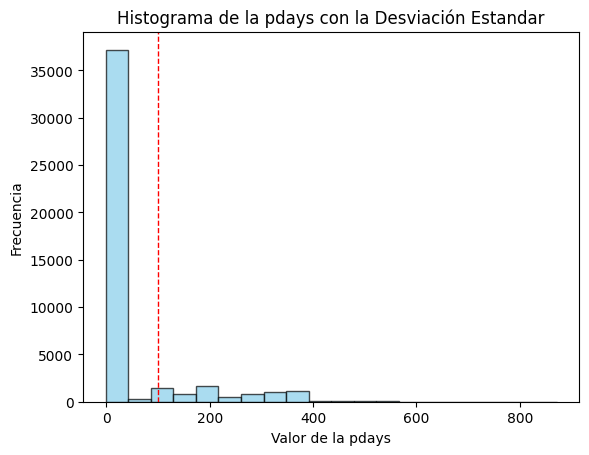

In [10]:
# Graficar un histograma del articulo " campaña"
plt.hist(data['pdays'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Agregar linea vertical para mostrar la deviacion estandar
plt.axvline(desviacion_estandar, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y titulo
plt.xlabel('Valor de la pdays')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con la Desviación Estandar')

# Mostrar Grafica
plt.show()


##4.3 Filas repetidas


In [11]:
# Mostramos la cantidad de registros antes de aplicar una transformacion, limpieza o filtro
print(f'Tamaño del set antes de eliminar la filas repetidas:{data.shape}')
data.drop_duplicates(inplace=True)
# Mostramos la cantidad de registros despues de aplicar una transformacion, limpieza, filtro
print(f'Tamañano del set despues de eliminar las filas repetidas:{data.shape}')


Tamaño del set antes de eliminar la filas repetidas:(45207, 17)
Tamañano del set despues de eliminar las filas repetidas:(45203, 17)


##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:




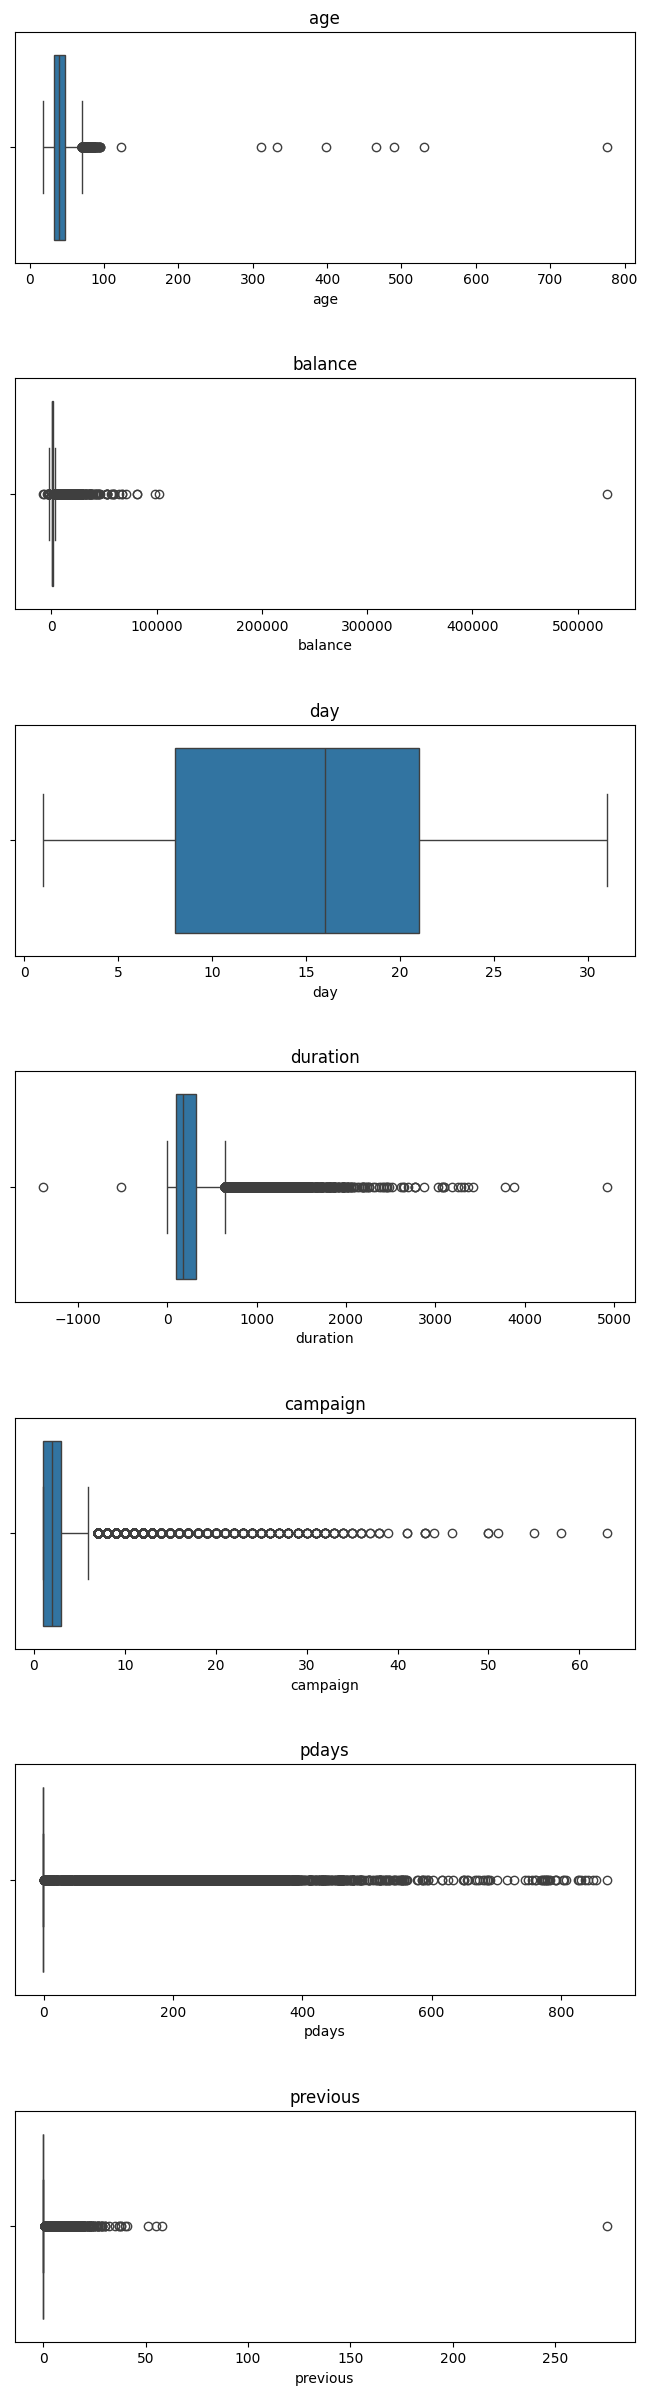

In [15]:
# Generar graficas individuales pues las variables numericas
# estan en rangos diferentes
cols_num = ['age', 'balance', 'day', 'duration', 'campaign',
            'pdays', 'previous']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)

**Observaciones:**
- "age": hay sujetos con edades mucho mayores a 100 años
- "duration": hay valores negativos
- "previous": hay un valor extremadamente alto (cercano a 300)



##4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

